# Project Overview

The question we will be hoping to answer is: “Can we predict a player’s salary based on their NBA statistics?” 
In this project, the player stats will be our features and the salary will be the output/target.

# Imports

In [1]:
# import dependencies 
import pandas as pd
from pathlib import Path
import matplotlib.pyplot as plt
# sklearn is the Scikit-learn machine learning library for Python. 
# It has many modules, including one for linear regression, which we use here as our model
# We will use linear regression since we are trying to predict an outcome (i.e. salary) based on an input(s) (i.e. points)
from sklearn.linear_model import LinearRegression 

In [2]:
# Our datasets currently contain data on NBA players and their season stats. 
# The data contains information such as their biography (i.e. name, height, weight, date of birth, birth city, birth state) 
    # as well as their NBA player statistics (i.e. position, points, assists, steals, shooting %s, etc.)

# This CSV was prepared and is how we anticipate our final dataset to look like/be structured 
    # like after we merge our various datasets
# We anticipate that the actual figures/data may be represented differently once they are cleaned/scaled 
# We also may be changing the various statistics (i.e. Pts, Asts, Stls, etc.) based on which statistic we want to include 

# load in our dataset and preview it 
df = pd.read_csv(Path('Sample_Data.csv'))
df


,Player ID,Player Name,year/season,position,Team,height,weight,G,GS,MP,...,ORB,DRB,TRB,AST,STL,BLK,TOV,PF,PTS,Salary
0,1,Curly Armstrong,2019,G-F,FTW,202,186,63,63,31,...,336,394,424,176,293,342,285,217,458,4247104
1,2,Cliff Barker,2008,SG,INO,213,186,49,49,44,...,405,434,308,109,498,370,378,99,279,6745718
2,3,Leo Barnhorst,1958,SF,CHS,191,190,67,67,24,...,287,350,336,140,385,348,479,192,438,4989455
3,4,Ed Bartels,1968,F,TOT,201,184,15,15,47,...,496,458,283,20,478,470,487,29,63,34782463
4,5,Ed Bartels,1988,F,DNN,209,183,13,13,28,...,415,398,405,20,364,333,257,27,59,11186029
5,6,Ed Bartels,1987,F,NYK,190,192,2,2,40,...,481,431,418,0,454,445,289,2,4,11777042
6,7,Ralph Beard,1980,G,INO,212,194,60,60,35,...,476,317,468,233,335,300,351,132,895,28316570
7,8,Gene Berce,2002,G-F,TRI,207,214,3,3,35,...,472,250,347,2,353,393,430,6,10,6970265
8,9,Charlie Black,1956,F-C,TOT,189,214,65,65,31,...,373,427,264,163,479,281,367,273,661,24046693


# Prepare the Model

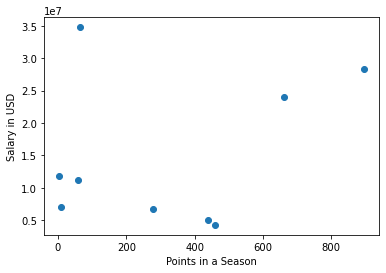

In [3]:
# The goal of this regression is to predict salary based on the various player statistics 
# We can start by creating a visualization and comparing one of the statistics to see if there is a relationship
# We will start with points as an example
plt.scatter(df.PTS, df.Salary)
plt.xlabel('Points in a Season')
plt.ylabel('Salary in USD')
plt.show()

In [4]:
# The next line of code formats the data to meet the requirements of the Scikit-learn library
# The first argument of reshape() specifies the number of rows; -1 means unspecified or automatically find out
# The second argument of reshape() refers to the number of columns; 1 means one column of independent variables 
X = df.PTS.values.reshape(-1, 1)

In [5]:
# We can see that an array is created for our x values which holds the points scored in the season
X[:9]

array([[458],
       [279],
       [438],
       [ 63],
       [ 59],
       [  4],
       [895],
       [ 10],
       [661]], dtype=int64)

In [6]:
# When we examine the shape of X, we see that there are 9 rows and 1 column for our sample data
# This represents the 9 rows of sample data and the 1 column for their points in a season
X.shape

(9, 1)

In [7]:
# Next, we assign the target variable, or the Salary column, to y 
# (Scikit-learn suggested convention is to capatialze X but not y)
y = df.Salary

In [8]:
# This creates an object from the LinearRegression class which acts as template that has the algorithms required 
    # to perform linear regression
model = LinearRegression()

# Fit the Model

In [9]:
# We will fit the model after it is instantiated, and it will analyze the data and attempt to learn patterns in the data
model.fit(X, y)

LinearRegression()

In [10]:
# After the learning stage, the predict() method is used to generate predictions (i.e. predict salary based on PTs in a season)
y_pred = model.predict(X)
# we can see that the shape of y matches x because there is a prediction made for each x (i.e. points) now
print(y_pred.shape)

(9,)


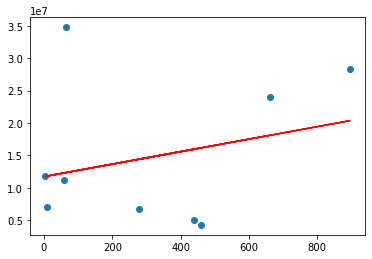

[9648.66564252]
11710957.178098716


In [11]:
# We will plot the predictions as a red line against the data points
plt.scatter(X, y)
plt.plot(X, y_pred, color='red')
plt.show()

# Then print the slope and the y-intercept to determine if there is a relationship
print(model.coef_)
print(model.intercept_)